In [1]:
# improts
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

print("GPU Available:", tf.test.is_gpu_available())
print("GPU Details:", tf.config.experimental.list_physical_devices('GPU'))

2024-11-27 01:20:36.319611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732666836.407402    2364 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732666836.434557    2364 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 01:20:36.649908: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: True
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1732666839.973355    2364 gpu_device.cc:2022] Created device /device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:05:00.0, compute capability: 8.6


Malignant, Tumor:


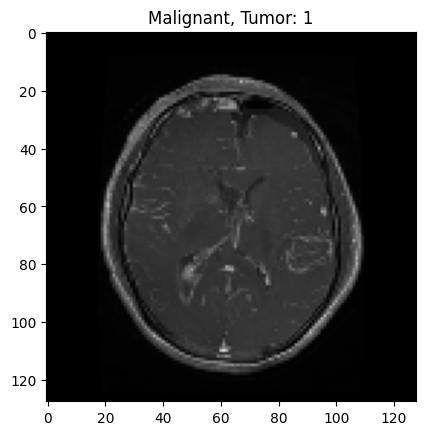

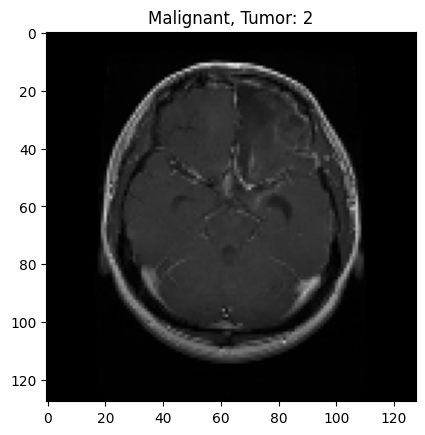

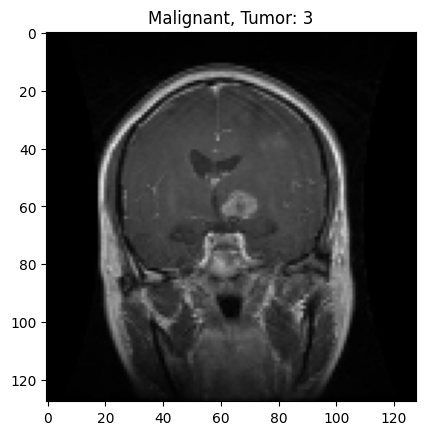

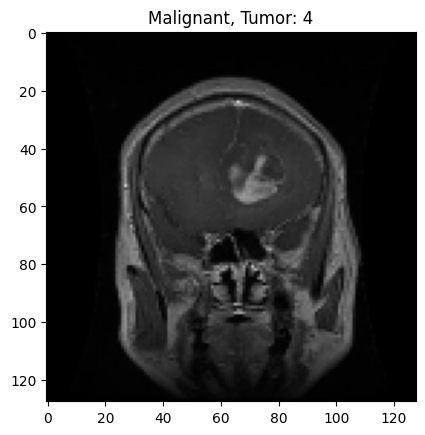

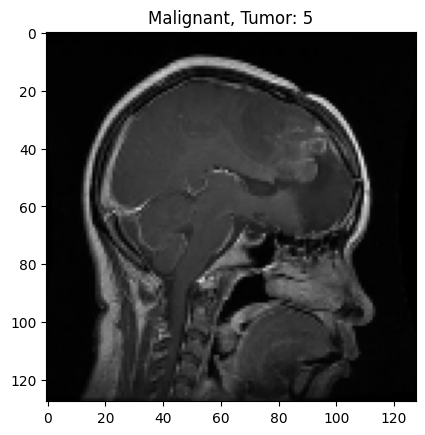

In [2]:

print("Malignant, Tumor:")
glioma_folder ="Training/glioma"
x=0

for img_name in os.listdir(glioma_folder):
    img_path = os.path.join(glioma_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Malignant, Tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

No tumor:


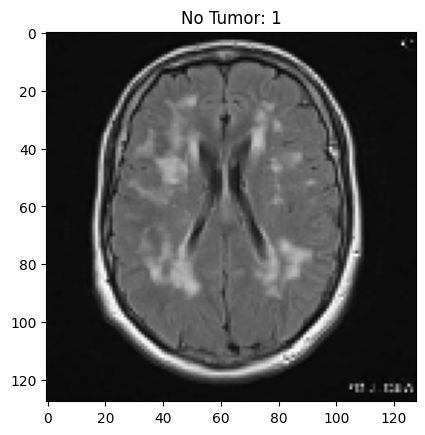

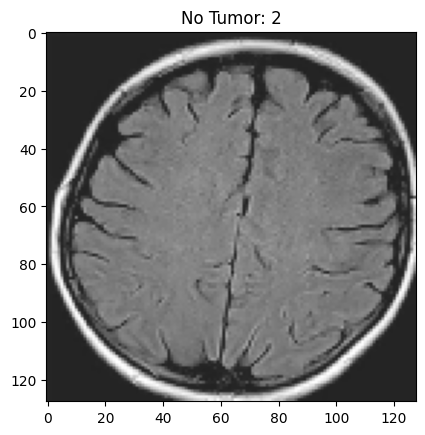

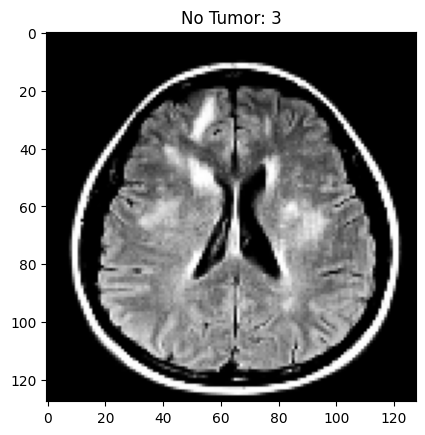

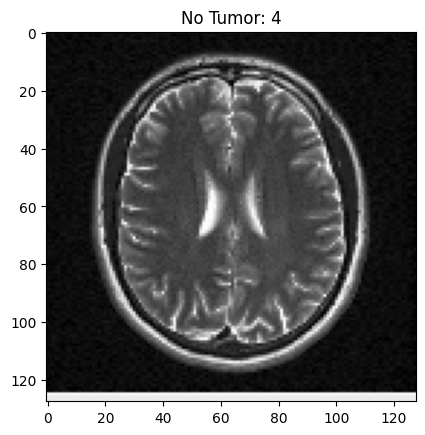

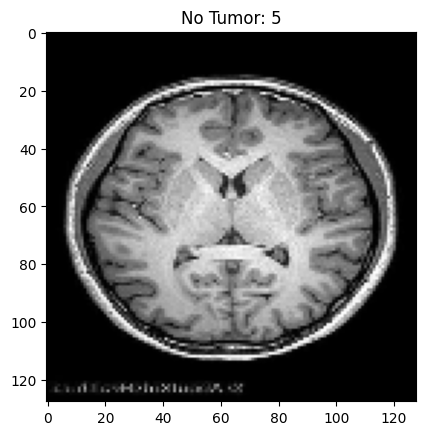

In [3]:
print("No tumor:")
notumor_folder="Training/notumor"
x=0

for img_name in os.listdir(notumor_folder):
    img_path = os.path.join(notumor_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("No Tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

Beningn:


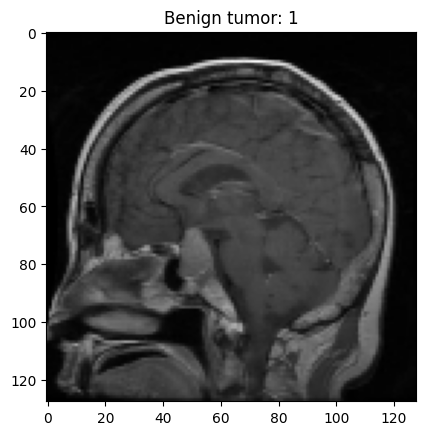

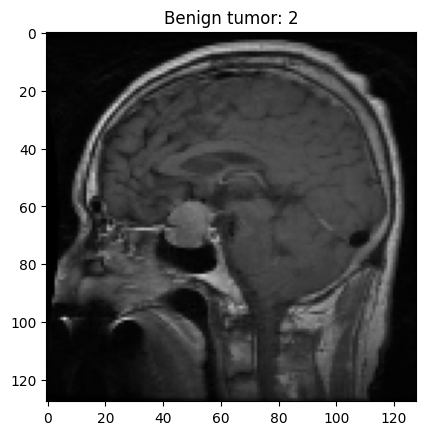

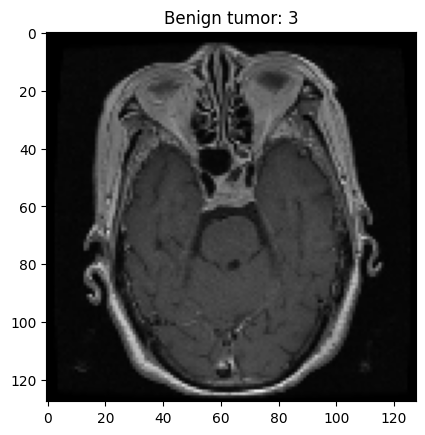

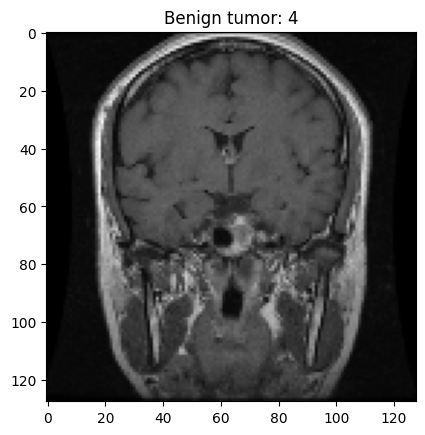

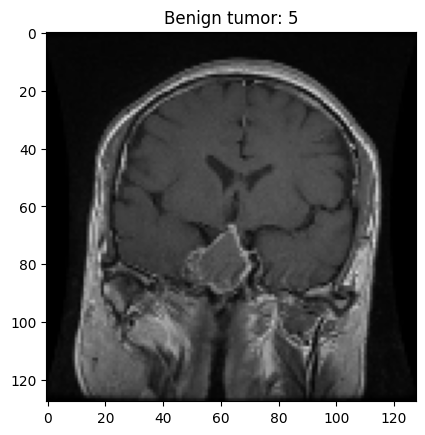

In [4]:
print("Beningn:")
benign_folder="Training/pituitary"
x=0

for img_name in os.listdir(benign_folder):
    img_path = os.path.join(benign_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title("Benign tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

In [5]:
original_folders = {
    "Glioma": "Training/glioma",
    "No Tumor": "Training/notumor",
    "Pituitary": "Training/pituitary",
    "Meningioma": "Training/meningioma"
}


categories = {
    "Tumor": ["Glioma", "Pituitary", "Meningioma"],
    "No Tumor": ["No Tumor"],
    "Benign": ["Pituitary"],
    "Malignant": ["Glioma", "Meningioma"]
}


category_counts = {cat: 0 for cat in categories}

for category, included_folders in categories.items():
    for folder in included_folders:
        folder_path = original_folders[folder]
        category_counts[category] += len(os.listdir(folder_path))

print("Number of images in each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")


image_formats = Counter()
image_sizes = Counter()

for folder, path in original_folders.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        img = cv2.imread(img_path)

        if img is None:
            continue

        image_formats[img_name.split('.')[-1].lower()] += 1
        image_sizes[img.shape[:2]] += 1

print("\nImage formats:")
for fmt, count in image_formats.items():
    print(f"{fmt}: {count}")

print("\nImage sizes:")
for size, count in image_sizes.items():
    print(f"{size}: {count} images")

print("\nPotential Class Imbalance:")
max_class = max(category_counts, key=category_counts.get)
min_class = min(category_counts, key=category_counts.get)
print(f"Most images: {max_class} ({category_counts[max_class]} images)")
print(f"Fewest images: {min_class} ({category_counts[min_class]} images)")
imbalance_ratio = category_counts[max_class] / category_counts[min_class]
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")


Number of images in each category:
Tumor: 4117
No Tumor: 1595
Benign: 1457
Malignant: 2660

Image formats:
jpg: 5712

Image sizes:
(512, 512): 3955 images
(442, 441): 14 images
(490, 410): 1 images
(1075, 890): 2 images
(872, 850): 3 images
(474, 356): 8 images
(236, 214): 20 images
(301, 275): 4 images
(251, 201): 43 images
(417, 428): 33 images
(225, 225): 268 images
(275, 220): 9 images
(250, 201): 26 images
(540, 504): 18 images
(244, 201): 1 images
(664, 550): 16 images
(168, 300): 38 images
(222, 227): 22 images
(262, 227): 19 images
(442, 442): 37 images
(630, 630): 77 images
(218, 234): 4 images
(242, 208): 18 images
(264, 235): 1 images
(217, 232): 35 images
(260, 314): 1 images
(212, 220): 2 images
(213, 236): 17 images
(512, 446): 1 images
(282, 230): 15 images
(198, 150): 36 images
(442, 400): 16 images
(251, 236): 4 images
(248, 208): 4 images
(649, 926): 2 images
(686, 626): 1 images
(326, 276): 12 images
(262, 224): 1 images
(350, 350): 11 images
(192, 192): 27 images
(4

In [6]:
original_folders = {
    "Glioma": "Training/glioma",
    "No Tumor": "Training/notumor",
    "Pituitary": "Training/pituitary",
    "Meningioma": "Training/meningioma"
}

resize_dim = (128, 128)

resized_normalized_images = []

for folder, path in original_folders.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img_resized = cv2.resize(img, resize_dim)
        img_normalized = img_resized / 255.0
        resized_normalized_images.append(img_normalized)

print(f"Processed {len(resized_normalized_images)} images (resized and normalized).")


Processed 5712 images (resized and normalized).


In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf

train_path = 'Training'
test_path = "Testing"

folder_labels = {
    "glioma": 1,
    "pituitary": 1,
    "meningioma": 1, 
    "notumor": 0 
}

def folders_to_labels(path):
    images = []
    labels = []
    for subfolder_name in os.listdir(path):
        subfolder_path = os.path.join(path, subfolder_name)

        if os.path.isdir(subfolder_path):
            label_value = folder_labels.get(subfolder_name.lower())
            
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)

                if img_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img_resized = cv2.resize(img, (128, 128)) 
                        img_normalized = img_resized / 255.0 

                        images.append(img_normalized)
                        labels.append(label_value)

    return np.array(images), np.array(labels)

train_x,train_y = folders_to_labels(train_path)
test_x, test_y = folders_to_labels(test_path)

print(f"Shape of x_data: {train_x.shape}")
print(f"Shape of y_data: {train_y.shape}")

model_binary = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((8, 8)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model_binary.summary()


first_hist = model_binary.fit(train_x, train_y, epochs=10, validation_data=(test_x,test_y))

model_binary.evaluate(test_x, test_y, verbose=2)

Shape of x_data: (5712, 128, 128)
Shape of y_data: (5712,)


/home/djk/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732666852.861591    2364 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:05:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 900)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        28,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,905 (112.91 KB)

 Trainable params: 28,905 (112.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-11-27 01:20:54.296833: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 374341632 exceeds 10% of free system memory.
2024-11-27 01:20:54.592399: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 374341632 exceeds 10% of free system memory.
I0000 00:00:1732666855.271224    2483 service.cc:148] XLA service 0x7fc950024c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732666855.271552    2483 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-11-27 01:20:55.299105: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732666855.419606    2483 cuda_dnn.cc:529] Loaded cuDNN version 90300


 55/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7381 - loss: 0.6003

I0000 00:00:1732666856.683907    2483 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8054 - loss: 0.4850 - val_accuracy: 0.8978 - val_loss: 0.2774
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9258 - loss: 0.2158 - val_accuracy: 0.9054 - val_loss: 0.2764
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9464 - loss: 0.1623 - val_accuracy: 0.9108 - val_loss: 0.2579
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9470 - loss: 0.1467 - val_accuracy: 0.9047 - val_loss: 0.2146
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9475 - loss: 0.1461 - val_accuracy: 0.9115 - val_loss: 0.2127
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9549 - loss: 0.1190 - val_accuracy: 0.9176 - val_loss: 0.2474
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1087 - val_accuracy: 0.9268 - val_loss: 0.1935
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9607 - loss: 0.1108 - val_accuracy: 0.9268 - val

[0.14997175335884094, 0.9382150769233704]

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import keras
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

img_width, img_height = 128, 128
batch_size = 32

main_dir = 'Training'


In [9]:
folder_labels2 = {
    "glioma": 0,
    "pituitary": 1,
    "meningioma": 2, 
}

categories = ["glioma", "meningioma", "pituitary"]

def folders_to_labels2(path):
    images = []
    labels = []
    for subfolder_name in os.listdir(path):
        subfolder_path = os.path.join(path, subfolder_name)

        if subfolder_name.lower() == 'notumor':
            continue

        if os.path.isdir(subfolder_path):
            label_value = folder_labels2.get(subfolder_name.lower())
            
            if label_value is not None:
                for img_name in os.listdir(subfolder_path):
                    img_path = os.path.join(subfolder_path, img_name)

                    if img_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img_resized = cv2.resize(img, (128, 128))  
                            img_normalized = img_resized / 255.0 

                            images.append(img_normalized)
                            labels.append(label_value)

    return np.array(images), np.array(labels)
second_train_x, second_train_y = folders_to_labels2(train_path)
second_test_x, second_test_y = folders_to_labels2(test_path)

print(f"Shape of x_data: {second_train_x.shape}")
print(f"Shape of y_data: {second_train_y.shape}")



Shape of x_data: (4117, 128, 128)
Shape of y_data: (4117,)


In [10]:
model_multi = Sequential([
        Conv2D(4, (3, 3), activation='relu', input_shape=(128,128,1)),
        MaxPooling2D((8, 8)),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])


In [11]:
model_multi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_multi.summary()

second_hist = model_multi.fit(
    second_train_x, second_train_y,
    epochs=10,
    validation_data=(second_test_x, second_test_y)
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 900)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        28,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,971 (113.17 KB)

 Trainable params: 28,971 (113.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-11-27 01:21:05.475487: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 269811712 exceeds 10% of free system memory.
2024-11-27 01:21:05.792072: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 269811712 exceeds 10% of free system memory.


129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5849 - loss: 0.8661 - val_accuracy: 0.6280 - val_loss: 0.8557
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.6529 - val_accuracy: 0.6932 - val_loss: 0.6791
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.5543 - val_accuracy: 0.7450 - val_loss: 0.5821
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4881 - val_accuracy: 0.7461 - val_loss: 0.5689
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8237 - loss: 0.4367 - val_accuracy: 0.8002 - val_loss: 0.4876
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.4189 - val_accuracy: 0.7693 - val_loss: 0.5456
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 0.3887 - val_accuracy: 0.7748 - val_loss: 0.5097
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8498 - loss: 0.3969 - val_accuracy: 0.8212 - val

{'accuracy': [0.8623949289321899, 0.9310224056243896, 0.9394257664680481, 0.9466036558151245, 0.9523809552192688, 0.9548319578170776, 0.9606092572212219, 0.963060200214386, 0.9665616154670715, 0.9697129130363464], 'loss': [0.370779424905777, 0.2029372602701187, 0.16930890083312988, 0.14749853312969208, 0.13543689250946045, 0.12008891254663467, 0.11676780879497528, 0.10626506805419922, 0.09718431532382965, 0.08834567666053772], 'val_accuracy': [0.8977879285812378, 0.9054157137870789, 0.9107551574707031, 0.9046529531478882, 0.9115179181098938, 0.9176201224327087, 0.9267734289169312, 0.9267734289169312, 0.9275362491607666, 0.9382150769233704], 'val_loss': [0.27737998962402344, 0.276382178068161, 0.25785931944847107, 0.21456068754196167, 0.21274682879447937, 0.24735838174819946, 0.1934775859117508, 0.18226948380470276, 0.18316267430782318, 0.14997175335884094]}


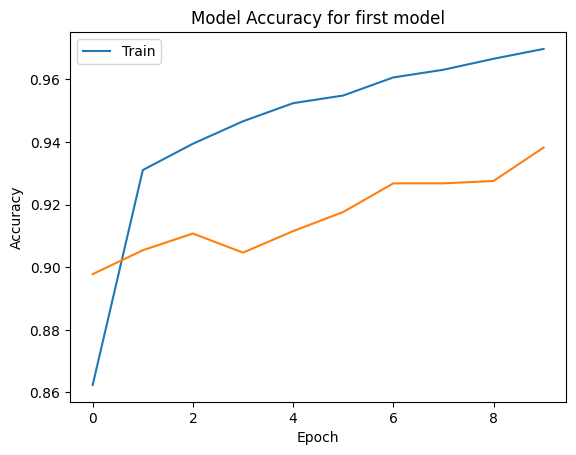

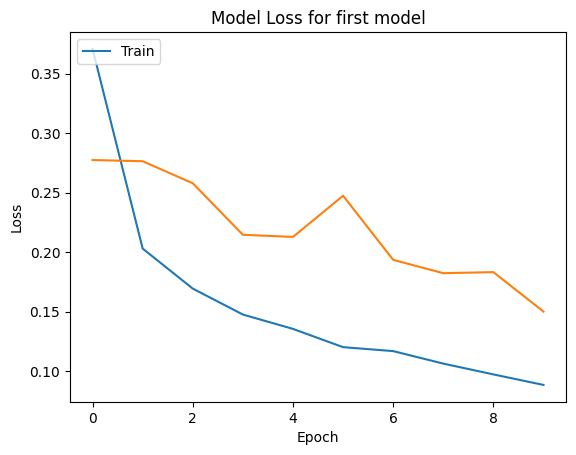

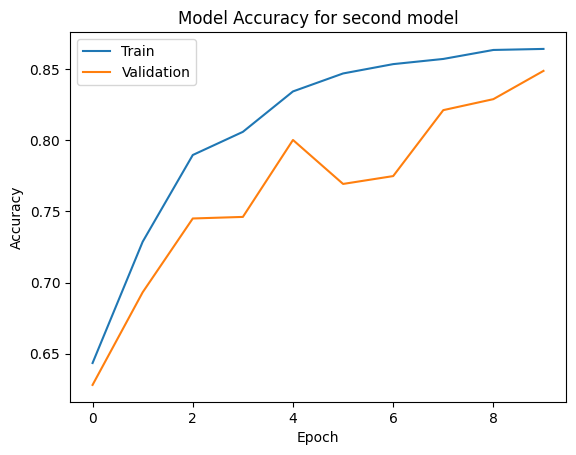

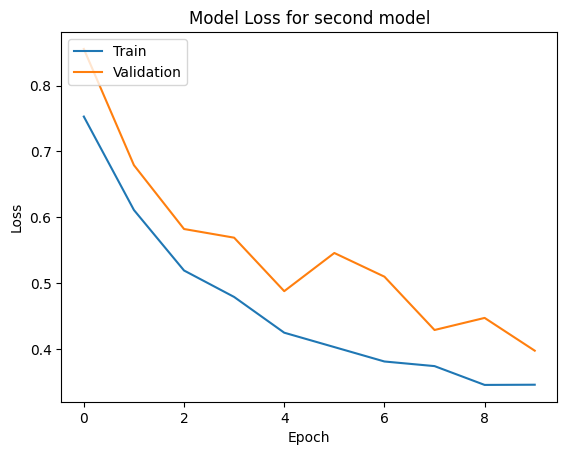

In [12]:
# Task 4
# Plot trainning, validation accuracy and loss for each epochs (model_eval and history vars)
print(first_hist.history)
plt.plot(first_hist.history['accuracy'])
plt.plot(first_hist.history['val_accuracy'])
plt.title('Model Accuracy for first model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(first_hist.history['loss'])
plt.plot(first_hist.history['val_loss'])
plt.title('Model Loss for first model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(second_hist.history['accuracy'])
plt.plot(second_hist.history['val_accuracy'])
plt.title('Model Accuracy for second model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(second_hist.history['loss'])
plt.plot(second_hist.history['val_loss'])
plt.title('Model Loss for second model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


29/29 - 0s - 2ms/step - accuracy: 0.8488 - loss: 0.3972
 1/29 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step

/home/djk/.local/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_6. Received: the structure of inputs=('*', '*')
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       300
           1       0.89      0.98      0.93       300
           2       0.82      0.75      0.78       306

    accuracy                           0.85       906
   macro avg       0.85      0.85      0.85       906
weighted avg       0.85      0.85      0.85       906

[[245   8  47]
 [  2 293   5]
 [ 45  30 231]]


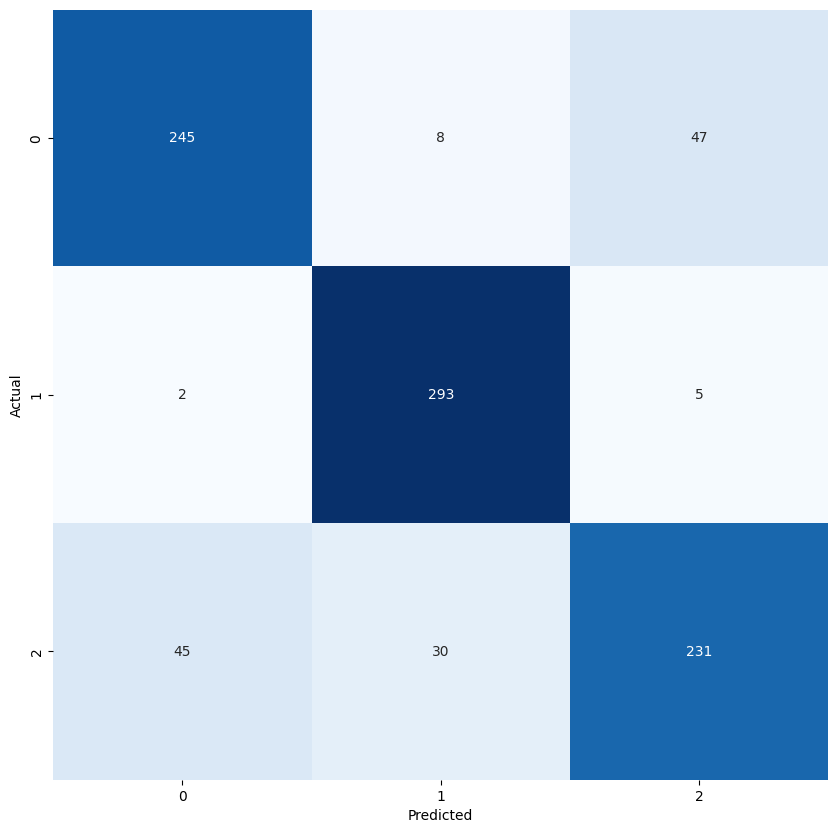

41/41 - 0s - 2ms/step - accuracy: 0.9382 - loss: 0.1500
35/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

/home/djk/.local/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=('*', '*')
  warnings.warn(


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[405   0]
 [906   0]]


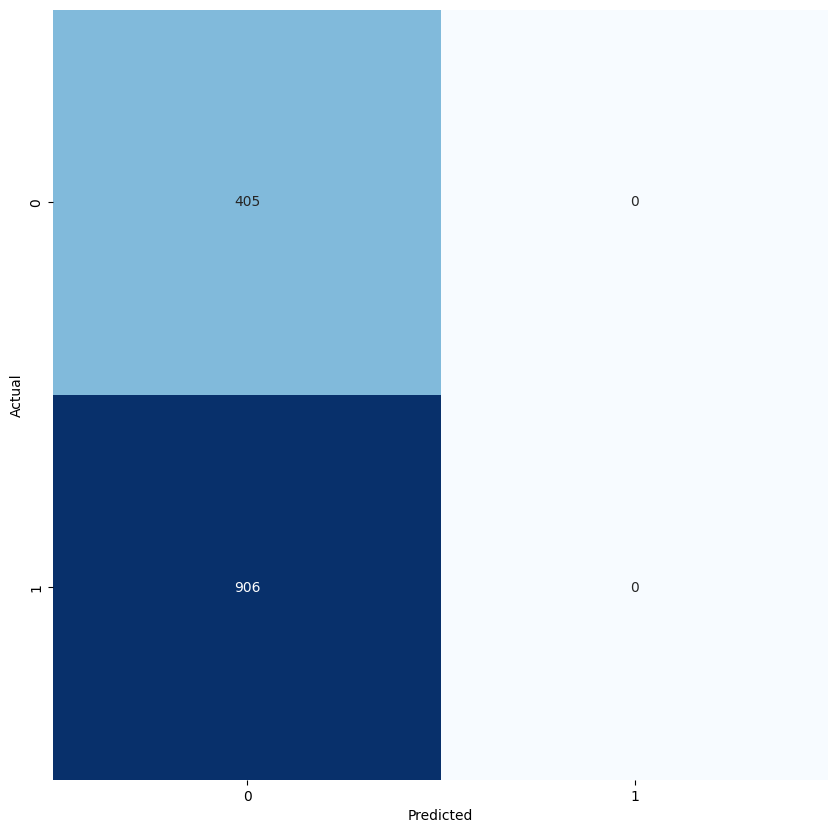

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Evaluate both modelss on the test set (report accuracy, precision, recall, f1-score)

test_dir = 'Training'
model_multi.evaluate(second_test_x, second_test_y, verbose=2)

predictions = model_multi.predict((second_test_x, second_test_y))
y_pred = np.argmax(predictions, axis=1)
y_true = second_test_y
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

model_binary.evaluate(test_x, test_y, verbose=2)
predictions = model_binary.predict((test_x, test_y))
y_pred = np.argmax(predictions, axis=1)
y_true = test_y
print(confusion_matrix(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# first model with applied improvement
first_impr_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

first_impr_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
first_impr_hist = first_impr_model.fit(train_x, train_y, epochs=10, batch_size=32)
first_impr_model.evaluate(train_x, train_y, verbose=2)

/home/djk/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


2024-11-27 01:21:15.938385: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 374341632 exceeds 10% of free system memory.


179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8449 - loss: 0.3675
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9649 - loss: 0.1018
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9747 - loss: 0.0784
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9756 - loss: 0.0706
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9856 - loss: 0.0381
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9882 - loss: 0.0371
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9941 - loss: 0.0161
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9945 - loss: 0.0139
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9947 - loss: 0.0171
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9948 - loss: 0.0163
179/179 - 1s - 8ms/step - accuracy: 0.9984 - loss: 0.0053


[0.005348444916307926, 0.9984243512153625]

In [15]:
# second model with applied improvement

second_impr_model = Sequential([
    Input(shape=(img_width, img_height, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

second_impr_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
second_impr_hist = second_impr_model.fit(
    second_train_x, second_train_y,
    epochs=10,
    validation_data=(second_test_x, second_test_y)
)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5666 - loss: 0.8912 - val_accuracy: 0.7528 - val_loss: 0.5484
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7893 - loss: 0.5046 - val_accuracy: 0.8532 - val_loss: 0.3710
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8370 - loss: 0.3829 - val_accuracy: 0.8444 - val_loss: 0.3588
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8929 - loss: 0.2760 - val_accuracy: 0.9106 - val_loss: 0.2333
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9095 - loss: 0.2180 - val_accuracy: 0.9205 - val_loss: 0.2226
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9308 - loss: 0.1814 - val_accuracy: 0.9272 - val_loss: 0.2049
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9479 - loss: 0.1528 - val_accuracy: 0.9393 - val_loss: 0.1704
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9564 - loss: 0.1084 - val_acc

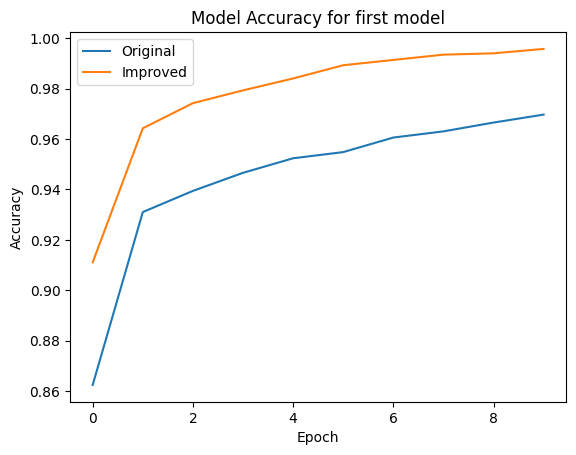

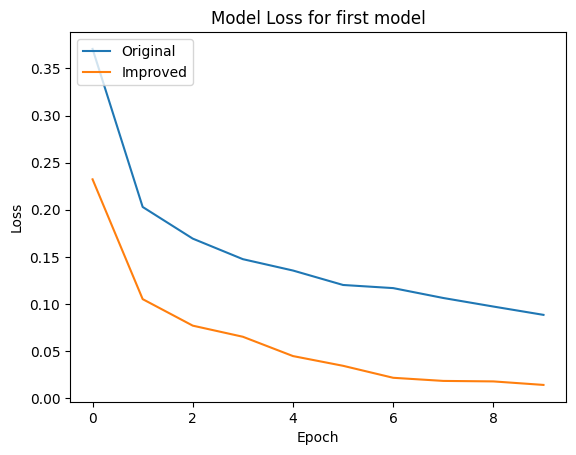

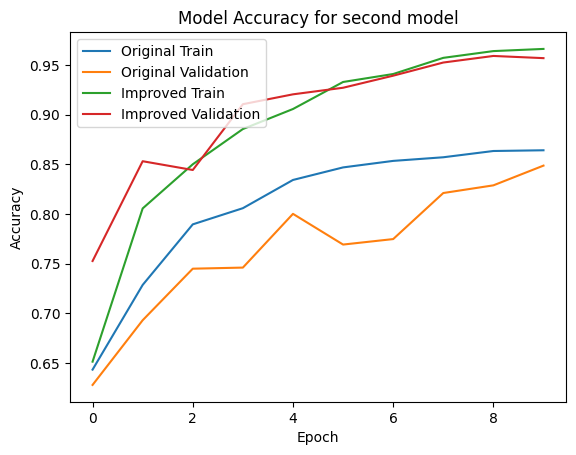

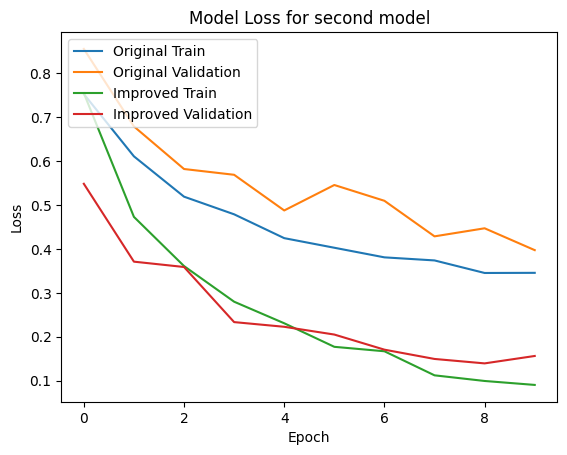

In [16]:
# compare the performace of improved models with the original models using same metrics

plt.plot(first_hist.history['accuracy'])
plt.plot(first_impr_hist.history['accuracy'])
plt.title('Model Accuracy for first model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original', 'Improved'], loc='upper left')
plt.show()

plt.plot(first_hist.history['loss'])
plt.plot(first_impr_hist.history['loss'])
plt.title('Model Loss for first model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Original', 'Improved'], loc='upper left')
plt.show()

plt.plot(second_hist.history['accuracy'])
plt.plot(second_hist.history['val_accuracy'])
plt.plot(second_impr_hist.history['accuracy'])
plt.plot(second_impr_hist.history['val_accuracy'])
plt.title('Model Accuracy for second model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original Train', 'Original Validation', 'Improved Train', 'Improved Validation'], loc='upper left')
plt.show()

plt.plot(second_hist.history['loss'])
plt.plot(second_hist.history['val_loss'])
plt.plot(second_impr_hist.history['loss'])
plt.plot(second_impr_hist.history['val_loss'])
plt.title('Model Loss for second model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Original Train', 'Original Validation', 'Improved Train', 'Improved Validation'], loc='upper left')
plt.show()

In [17]:
'''

This part is commented out because it kills the kernel.

'''

# Perform k-fold cross validation on the improved models and evaluate the model's accuracy, precision, recall, f1 score across the different folds

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # k-fold cross validation
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# first_impr_accuracy = []
# first_impr_precision = []
# first_impr_recall = []
# first_impr_f1 = []

# for train_index, test_index in kf.split(train_x):
#     x_train, x_test = train_x[train_index], train_x[test_index]
#     y_train, y_test = train_y[train_index], train_y[test_index]


#     first_impr_model.fit(x_train, y_train, epochs=10, batch_size=32)
#     first_impr_predictions = first_impr_model.predict(x_test)
#     first_impr_y_pred = np.argmax(first_impr_predictions, axis=1)
#     first_impr_y_true = y_test
#     first_impr_accuracy.append(accuracy_score(first_impr_y_true, first_impr_y_pred))
#     first_impr_precision.append(precision_score(first_impr_y_true, first_impr_y_pred, average='macro'))
#     first_impr_recall.append(recall_score(first_impr_y_true, first_impr_y_pred, average='macro'))
#     first_impr_f1.append(f1_score(first_impr_y_true, first_impr_y_pred, average='macro'))
    
# print(f'First improved model accuracy: {first_impr_accuracy}')
# print(f'First improved model precision: {first_impr_precision}')
# print(f'First improved model recall: {first_impr_recall}')
# print(f'First improved model f1: {first_impr_f1}')

In [18]:
# second_impr_accuracy = []
# second_impr_precision = []
# second_impr_recall = []
# second_impr_f1 = []

# for train_index, test_index in kf.split(second_train_x):
#     x_train, x_test = second_train_x[train_index], second_train_x[test_index]
#     y_train, y_test = second_train_y[train_index], second_train_y[test_index]

#     second_impr_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=4)
#     y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=4)
    
#     second_impr_model.fit(x_train, y_train_one_hot, epochs=10)
#     second_impr_predictions = second_impr_model.predict(x_test)
#     second_impr_y_pred = np.argmax(second_impr_predictions, axis=1)
#     second_impr_y_true = y_test
#     second_impr_accuracy.append(accuracy_score(second_impr_y_true, second_impr_y_pred))
#     second_impr_precision.append(precision_score(second_impr_y_true, second_impr_y_pred, average='macro'))
#     second_impr_recall.append(recall_score(second_impr_y_true, second_impr_y_pred, average='macro'))
#     second_impr_f1.append(f1_score(second_impr_y_true, second_impr_y_pred, average='macro'))
    
# print(f'Second improved model accuracy: {second_impr_accuracy}')
# print(f'Second improved model precision: {second_impr_precision}')
# print(f'Second improved model recall: {second_impr_recall}')
# print(f'Second improved model f1: {second_impr_f1}')

In [19]:
data_path = "./newDataset/Testing"

test_x_new, test_y_new = folders_to_labels(data_path)
model_binary_test = first_impr_model.evaluate(test_x_new, test_y_new, verbose=2)

second_test_x_new, second_test_y_new = folders_to_labels2(data_path)
model_multi_test = second_impr_model.evaluate(second_test_x_new, second_test_y_new, verbose=2)


13/13 - 0s - 19ms/step - accuracy: 0.8426 - loss: 1.0509
10/10 - 0s - 45ms/step - accuracy: 0.5779 - loss: 5.9176
